# Hackaton Poland 2025-04-12

Didn't participate (wasn't selected by my professor), just some friends did and asked me for help...

Problem: create quantum algo for Annealing simulation.

Simpler problem that is solved here:

QAOA use and find smallest 6 values in array, use optimization i guess...

## Max-cut

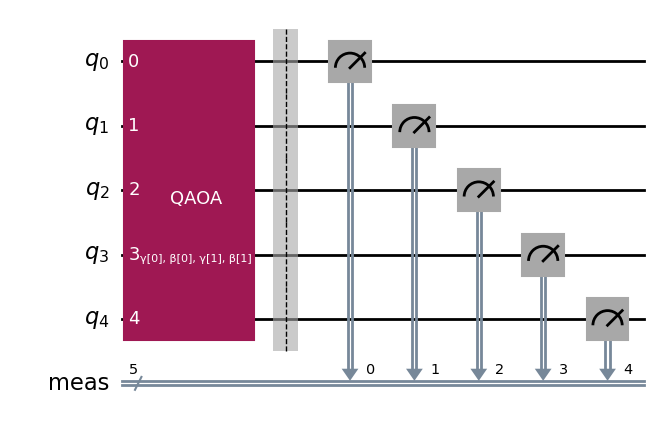

In [11]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp

cost_hamiltonian = SparsePauliOp(['IIIZZ', 'IIZIZ', 'ZIIIZ', 'IIZZI', 'IZZII', 'ZZIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])

circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)
circuit.measure_all()

circuit.draw('mpl')

## Linear program (LP) translation to Hamiltonian using Ising map. Example

### Linear Program:

Minimize:
$$
\text{minimize} \quad 3x_1 + 2x_2 + 4x_3
$$
Subject to:
$$
x_1 + x_2 + x_3 = 6
$$

### Mapping to Ising Hamiltonian:

1. **Linear Terms**: The objective function \( 3x_1 + 2x_2 + 4x_3 \) maps to:

$$
H_{\text{linear}} = - \left( 3s_1 + 2s_2 + 4s_3 \right)
$$

2. **Constraint**: The constraint \( x_1 + x_2 + x_3 = 6 \) can be handled with a penalty term:

$$
H_{\text{penalty}} = \lambda \left( s_1 + s_2 + s_3 - 6 \right)^2
$$

3. **Final Hamiltonian**:
$$
H = - \left( 3s_1 + 2s_2 + 4s_3 \right) + \lambda \left( s_1 + s_2 + s_3 - 6 \right)^2
$$

Let me know if you need any further adjustments!

## Linear program for finding 6 smallest numbers in an array

Variables:
   - x1, x2, x3...
   - b1, b2, b3...

Constraint: sum (b_i) = 6

Objective: minimize sum (x_i * b_i)

## Misc

Off topic, but looks cool:

https://physics.weber.edu/schroeder/software/demos/IsingModel.html

Example of constructing ising hamiltonian from quadratic objective:

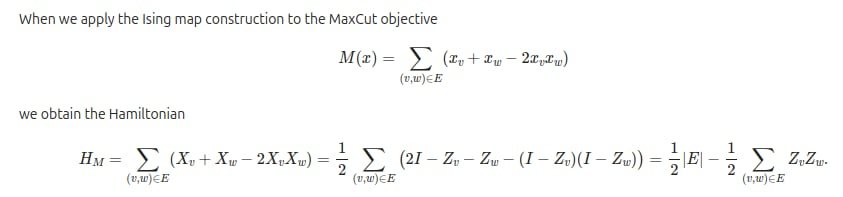

## Our LP hamiltonian according to chatgpt
Apologies! Here's the Ising Hamiltonian using the proper dollar signs for copying:

### Given:
- Variables: \( x_1, x_2, x_3, \dots \) (real variables) and \( b_1, b_2, b_3, \dots \) (binary variables).
- Objective: Minimize \( \sum_{i} x_i b_i \).
- Constraint: \( \sum_{i} b_i = 6 \), where \( b_i \in \{0, 1\} \) (binary).

### Step 1: Linear Program Mapping to Ising Model

1. **Binary Variables Mapping**:
   - The binary variables \( b_i \in \{0, 1\} \) can be mapped to Ising spins \( s_i \in \{-1, +1\} \) using:
   $$
   b_i = \frac{1}{2}(s_i + 1)
   $$

2. **Objective Function**:
   The objective function \( \sum_i x_i b_i \) becomes:
   $$
   \sum_i x_i b_i = \sum_i x_i \cdot \frac{1}{2}(s_i + 1) = \frac{1}{2} \sum_i x_i (s_i + 1) = \frac{1}{2} \left( \sum_i x_i s_i + \sum_i x_i \right)
   $$

   The Hamiltonian term for the objective is:
   $$
   H_{\text{obj}} = - \frac{1}{2} \sum_i x_i s_i
   $$

3. **Constraint**:
   The constraint \( \sum_i b_i = 6 \) becomes:
   $$
   \sum_i b_i = \sum_i \frac{1}{2}(s_i + 1) = 6
   $$

   Simplifying:
   $$
   \sum_i s_i + N = 12
   $$

   Where \( N \) is the total number of binary variables (i.e., the number of \( b_i \)'s).

   This gives us a penalty term for the constraint:
   $$
   H_{\text{constraint}} = \lambda \left( \sum_i s_i + N - 12 \right)^2
   $$

### Step 2: Final Hamiltonian

Combining the objective and constraint terms, the total Hamiltonian is:
$$
H = - \frac{1}{2} \sum_i x_i s_i + \lambda \left( \sum_i s_i + N - 12 \right)^2
$$

Where:
- \( s_i \in \{-1, +1\} \),
- \( x_i \) are real coefficients,
- \( N \) is the total number of binary variables \( b_i \),
- \( \lambda \) is a large penalty parameter for the constraint.

This Hamiltonian represents the linear program as an Ising model.

## COde for ising hamiltonian for our LP

In [12]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np

# Define the items and their values
c = np.array([294.0, 320.0, 385.0, 439.0, 544.0, 800.0, 380.0, 402.0, 473.0, 570.0, 119.0, 225.0, 356.0, 350.0])

# Create binary variables (spins) for each item
n = len(c)  # Number of items
b = [f"b{i}" for i in range(n)]  # Binary variables

# Hamiltonian for the objective (minimizing sum of selected values)
cost_hamiltonian = SparsePauliOp(
    [''.join(['I' if i != j else 'Z' for i in range(n)]) for j in range(n)],
    coeffs=[c[j] for j in range(n)]
)

# Hamiltonian for the constraint (exactly 6 items selected)
lambda_penalty = 1000  # Penalty parameter
constraint_hamiltonian = SparsePauliOp(
    [''.join(['I' if i != j else 'Z' for i in range(n)]) for j in range(n)],
    coeffs=[lambda_penalty] * n
)

# Combine objective and constraint Hamiltonians
total_hamiltonian = cost_hamiltonian + constraint_hamiltonian

print("Total Hamiltonian:")
print(total_hamiltonian)

Total Hamiltonian:
SparsePauliOp(['ZIIIIIIIIIIIII', 'IZIIIIIIIIIIII', 'IIZIIIIIIIIIII', 'IIIZIIIIIIIIII', 'IIIIZIIIIIIIII', 'IIIIIZIIIIIIII', 'IIIIIIZIIIIIII', 'IIIIIIIZIIIIII', 'IIIIIIIIZIIIII', 'IIIIIIIIIZIIII', 'IIIIIIIIIIZIII', 'IIIIIIIIIIIZII', 'IIIIIIIIIIIIZI', 'IIIIIIIIIIIIIZ', 'ZIIIIIIIIIIIII', 'IZIIIIIIIIIIII', 'IIZIIIIIIIIIII', 'IIIZIIIIIIIIII', 'IIIIZIIIIIIIII', 'IIIIIZIIIIIIII', 'IIIIIIZIIIIIII', 'IIIIIIIZIIIIII', 'IIIIIIIIZIIIII', 'IIIIIIIIIZIIII', 'IIIIIIIIIIZIII', 'IIIIIIIIIIIZII', 'IIIIIIIIIIIIZI', 'IIIIIIIIIIIIIZ'],
              coeffs=[ 294.+0.j,  320.+0.j,  385.+0.j,  439.+0.j,  544.+0.j,  800.+0.j,
  380.+0.j,  402.+0.j,  473.+0.j,  570.+0.j,  119.+0.j,  225.+0.j,
  356.+0.j,  350.+0.j, 1000.+0.j, 1000.+0.j, 1000.+0.j, 1000.+0.j,
 1000.+0.j, 1000.+0.j, 1000.+0.j, 1000.+0.j, 1000.+0.j, 1000.+0.j,
 1000.+0.j, 1000.+0.j, 1000.+0.j, 1000.+0.j])


4


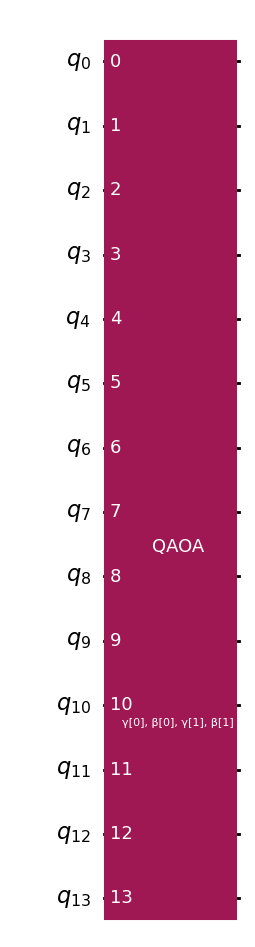

In [13]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp

cost_hamiltonian = SparsePauliOp(['ZIIIIIIIIIIIII', 'IZIIIIIIIIIIII', 'IIZIIIIIIIIIII', 'IIIZIIIIIIIIII', 'IIIIZIIIIIIIII', 'IIIIIZIIIIIIII', 'IIIIIIZIIIIIII', 'IIIIIIIZIIIIII', 'IIIIIIIIZIIIII', 'IIIIIIIIIZIIII', 'IIIIIIIIIIZIII', 'IIIIIIIIIIIZII', 'IIIIIIIIIIIIZI', 'IIIIIIIIIIIIIZ', 'ZIIIIIIIIIIIII', 'IZIIIIIIIIIIII', 'IIZIIIIIIIIIII', 'IIIZIIIIIIIIII', 'IIIIZIIIIIIIII', 'IIIIIZIIIIIIII', 'IIIIIIZIIIIIII', 'IIIIIIIZIIIIII', 'IIIIIIIIZIIIII', 'IIIIIIIIIZIIII', 'IIIIIIIIIIZIII', 'IIIIIIIIIIIZII', 'IIIIIIIIIIIIZI', 'IIIIIIIIIIIIIZ'],
              coeffs=[ 294.+0.j,  320.+0.j,  385.+0.j,  439.+0.j,  544.+0.j,  800.+0.j,
  380.+0.j,  402.+0.j,  473.+0.j,  570.+0.j,  119.+0.j,  225.+0.j,
  356.+0.j,  350.+0.j, 1000.+0.j, 1000.+0.j, 1000.+0.j, 1000.+0.j,
 1000.+0.j, 1000.+0.j, 1000.+0.j, 1000.+0.j, 1000.+0.j, 1000.+0.j,
 1000.+0.j, 1000.+0.j, 1000.+0.j, 1000.+0.j])

ansatz = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)

print(ansatz.num_parameters)
ansatz.draw('mpl')

Optimal Parameters: [0. 0. 0. 0.]
Ground State Energy: -5.463370641306531e-14


/tmp/ipykernel_59172/2085757400.py:11: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


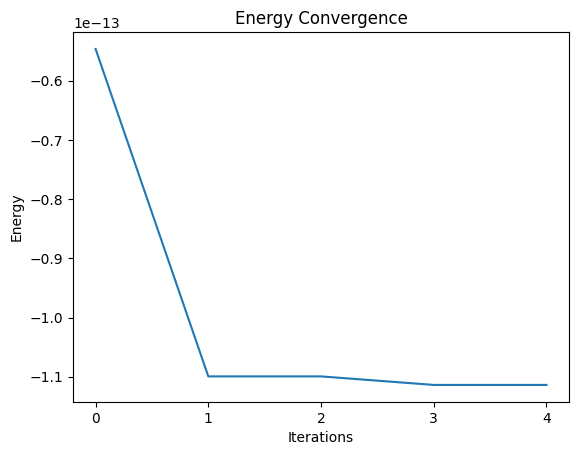

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.primitives import Estimator
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit_algorithms.optimizers import L_BFGS_B

optimizer = L_BFGS_B()
estimator = Estimator()


initial_point = np.zeros(ansatz.num_parameters)

results = []

# Function to estimate energy
def estimate_energy(parameters):
    job = estimator.run([ansatz], [cost_hamiltonian], [parameters])
    result = job.result()
    results.append(result.values[0])
    return result.values[0]

# Run optimization
result = optimizer.minimize(fun=estimate_energy, x0=initial_point)

# Print results
print("Optimal Parameters:", result.x)
print("Ground State Energy:", result.fun)

# Plot the energy convergence
plt.plot(results)
plt.xlabel('Iterations')
plt.xticks(range(len(results)))
plt.ylabel('Energy')
plt.title('Energy Convergence')
plt.show()

In [15]:
# Extract what items were selected as smallest, by measuring the circuit with optimal params
from qiskit_aer.primitives import Sampler as SamplerSim
from qiskit.circuit import ClassicalRegister

sampler_sim = SamplerSim()
clas_reg = ClassicalRegister(14)

optimal_params = [0, 0, 0, 0]
meas_circuit = ansatz.assign_parameters(optimal_params)
meas_circuit.add_register(clas_reg)
meas_circuit.measure_all()

job = sampler_sim.run([meas_circuit], shots=5)
result = job.result()

for bitstring_int, prob in result.quasi_dists[0].items():
    bitstring = format(bitstring_int, '014b')  # 14 qubits
    print(bitstring, prob)


110001110110100000000000000 0.2
1101001011001100000000000000 0.2
1000100011100100000000000000 0.2
110000100110100000000000000 0.2
10111010000000000000000 0.2


In [17]:
# Classically the 6 smallest items are:

c = np.array([294.0, 320.0, 385.0, 439.0, 544.0, 800.0, 380.0, 402.0, 473.0, 570.0, 119.0, 225.0, 356.0, 350.0])
selected_items= np.argsort(c)[:6]
bitstring = ''.join(['1' if i in selected_items else '0' for i in range(len(c))])
print("Bitstring for smallest 6 numbers:", bitstring)

Bitstring for smallest 6 numbers: 11000000001111


> GOT APPROXIMATELLY THE ANSWER :DD